### 2) Salary_hike -> Build a prediction model for Salary_hike
### Build a simple linear regression model by performing EDA and do 
### necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Importing data
df = pd.read_csv(r"Salary_Data.csv")

In [3]:
df.shape

(30, 2)

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot: >

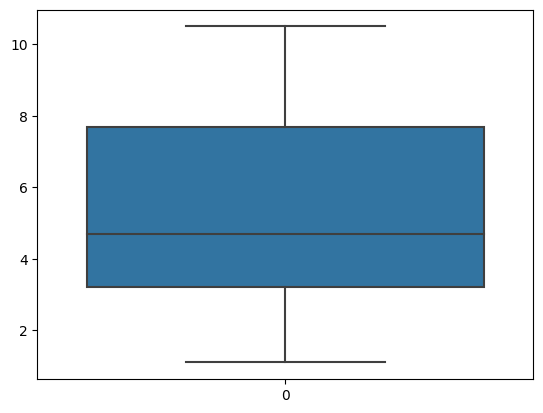

In [5]:
# Visualizing outliers using boxplot
import seaborn as sns
sns.boxplot(df['YearsExperience'])

In [6]:
# Correlation matrix for the given data.
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot: >

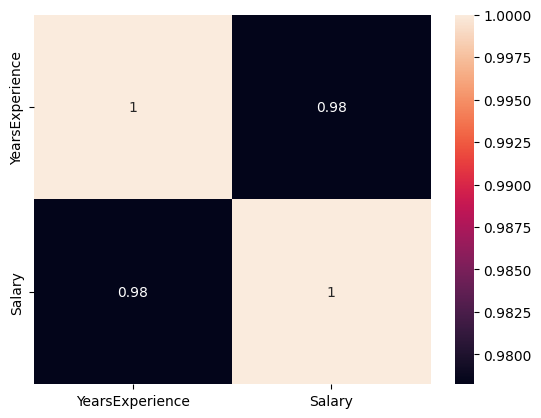

In [7]:
# Heatmaps for the given dataset.
sns.heatmap(df.corr(), annot=True)

In [8]:
# Finding Missing Values
df[df.isnull().any(axis=1)]

,YearsExperience,Salary


In [9]:
# Checking datatypes
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [10]:
# Checking dupliacte values
df[df.duplicated()]

,YearsExperience,Salary


In [11]:
# Old shape
df.shape

(30, 2)

In [12]:
# Detecting outliers using IQR and removing
Q1 = df['YearsExperience'].quantile(0.25)
Q3 = df['YearsExperience'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
upper_array =np.where(df['YearsExperience'] >= upper)[0]
lower_array = np.where(df['YearsExperience'] <= lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
print("New Shape: ", df.shape)

New Shape:  (30, 2)


(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

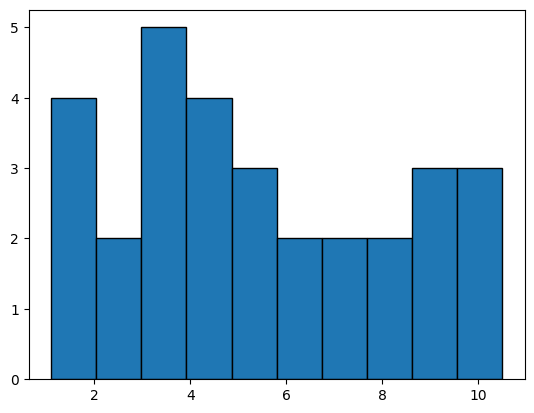

In [13]:
# Drawing Histogram to check the distribution of the data.
plt.hist(df['YearsExperience'], edgecolor='black')

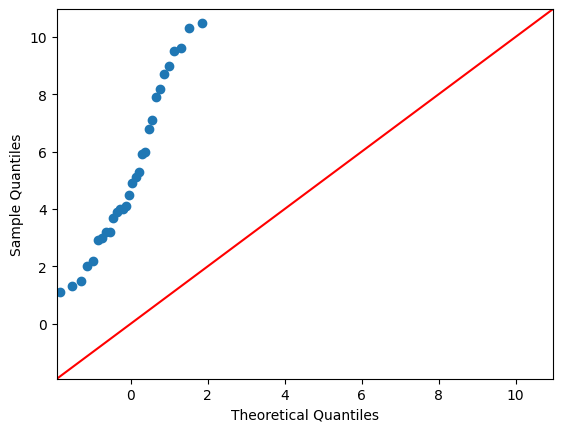

In [14]:
# Using Q-Q plot for checking the data distribution
fig = sm.qqplot(df['YearsExperience'], line='45')
plt.show()

### Both the plot shows that the data is not normally distributed 

In [15]:
# Applying cuberoot for each data to convert the dataset into normal distribution.

df1 = np.cbrt(df)
print(df1)

    YearsExperience     Salary
0          1.032280  34.011242
1          1.091393  35.883626
2          1.144714  33.540235
3          1.259921  35.175984
4          1.300591  34.168426
5          1.426043  38.404271
6          1.442250  39.181273
7          1.473613  37.901174
8          1.473613  40.092494
9          1.546680  38.527500
10         1.574061  39.836415
11         1.587401  38.211654
12         1.587401  38.475331
13         1.600521  38.503232
14         1.650964  39.388834
15         1.698499  40.804142
16         1.721301  40.418318
17         1.743513  43.636117
18         1.806969  43.332025
19         1.817121  45.458683
20         1.894536  45.100680
21         1.921997  46.147134
22         1.991632  46.616465
23         2.016530  48.461407
24         2.056710  47.831440
25         2.080084  47.263944
26         2.117912  48.905412
27         2.125317  48.293771
28         2.175767  49.649685
29         2.189760  49.579405


(array([3., 1., 1., 4., 5., 3., 3., 2., 3., 5.]),
 array([1.03228012, 1.14802806, 1.26377601, 1.37952395, 1.4952719 ,
        1.61101984, 1.72676779, 1.84251573, 1.95826368, 2.07401162,
        2.18975957]),
 <BarContainer object of 10 artists>)

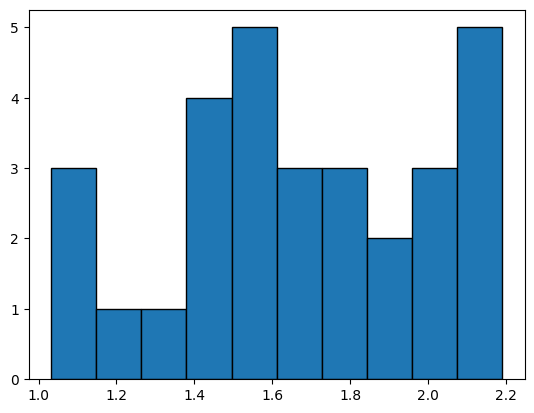

In [16]:
# Again checking the distribution and the data almost reached the normal distribution.
plt.hist(df1['YearsExperience'], edgecolor='black')

In [17]:
# Model building

import statsmodels.formula.api as smf
model = smf.ols(formula = 'Salary ~ YearsExperience', data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           6.37e-18
Time:                        00:36:01   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.6603      1.300     12.811      0.000      13.996      19.324
YearsExperience    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R-squared > 65%
### Adj. R-squared > 65%
### Adj. R-squared < R-squared
### Hence the model is good.

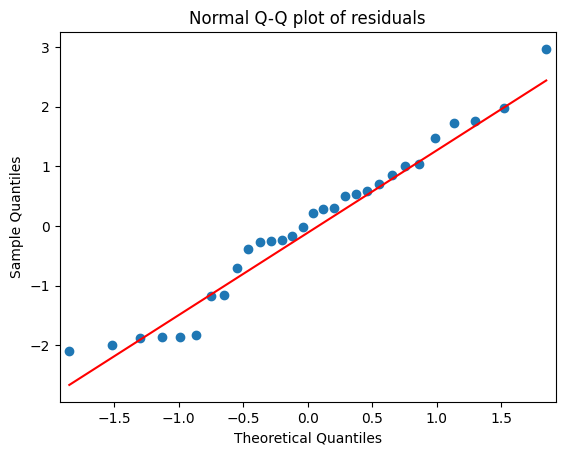

In [18]:
# Residual Analysis
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Points are Close to the line hence the model is good

In [19]:
# Checking for Homoscedasticity
def get_std_val(vals):
    return(vals-vals.mean())/vals.std()

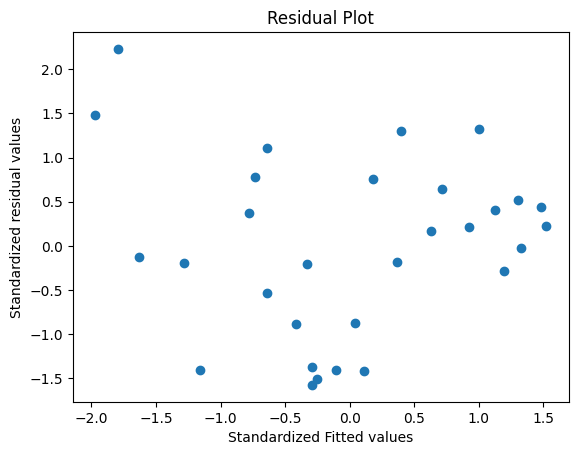

In [20]:
plt.scatter(get_std_val(model.fittedvalues),get_std_val(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Model is showing Homoscedasticity. Hence model is good.

In [21]:
# Predicting values for the new data.
new_data = pd.DataFrame({'YearsExperience':3}, index=[1])
new_data

,YearsExperience
1,3


In [23]:
pred = model.predict(new_data)
result = np.power(pred, 3)
print(result)

1    230899.586342
dtype: float64
